### Imports

In [33]:
import os
from os import path, makedirs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load the beta-VAE module
import bvae_model as bvae
import spectrum_preprocessing as sp

### Load raw spectra

In [38]:
#your path

path = "C:/Users/Zach/Documents/GitHub/betaVAE_Training/training_data/"
file = "SMP65#010 56d 820um.csv"
path = os.path.join(path, file)


In [39]:
filename = path.split("/")[-1]
filename

'SMP65#010 56d 820um.csv'

In [40]:
df = pd.read_csv(path, skiprows=[1,2])  # Skip metadata rows if present

if df.isnull().values.any():
    df = df.fillna(method='ffill').fillna(method='bfill')

print(f"Dataframe shape: {df.shape}")

Dataframe shape: (6144, 2100)


In [41]:
df

,map_x,map_y,Sample Name,1981.7 - 2095.8,3997.9328286151754,3996.348861567388,3994.7648945196006,3993.1809274718134,3991.5969604240263,3990.0129933762387,...,693.7775669308426,692.1935998830554,690.6096328352678,689.0256657874806,687.4416987396935,685.8577316919059,684.2737646441187,682.6897975963311,681.105830548544,679.5218635007568
0,37835.0,23566.2,56d 820um,3.37501,0.121854,0.123052,0.125267,0.124852,0.121766,0.119846,...,0.069733,0.118473,0.097608,0.046461,0.006555,-0.130599,-0.270158,-0.240741,-0.173601,-0.192546
1,37840.4,23566.2,56d 820um,3.47868,0.137812,0.141284,0.143638,0.142174,0.138028,0.134767,...,0.028372,0.082617,0.005378,-0.097086,-0.088911,-0.156188,-0.275018,-0.250462,-0.186251,-0.168059
2,37845.9,23566.2,56d 820um,3.48884,0.144484,0.145477,0.145505,0.143523,0.140064,0.138745,...,-0.112996,-0.144451,-0.085512,0.011752,0.038730,-0.025452,-0.110971,-0.075690,0.000836,-0.001360
3,37851.3,23566.2,56d 820um,3.46374,0.126649,0.125182,0.126915,0.130162,0.132865,0.133537,...,0.018854,-0.004136,0.007945,0.090701,0.094583,-0.002525,-0.152406,-0.202774,-0.243617,-0.321157
4,37856.7,23566.2,56d 820um,3.54652,0.146400,0.151522,0.157709,0.162416,0.162652,0.158444,...,0.130378,0.045837,0.036683,0.137193,0.286220,0.441123,0.589688,0.712391,0.765317,0.572018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,38155.6,24081.3,56d 820um,3.48875,0.110928,0.108931,0.108538,0.110507,0.113141,0.114505,...,-0.052861,0.091652,0.148885,0.117390,0.077365,0.057125,0.016094,-0.070053,-0.087427,0.036433
6140,38161.0,24081.3,56d 820um,3.39368,0.136041,0.134586,0.134734,0.136871,0.141067,0.145455,...,-0.133925,-0.157627,-0.172457,-0.192574,-0.176999,-0.143193,-0.141649,-0.157704,-0.136134,-0.096595
6141,38166.4,24081.3,56d 820um,3.35469,0.164902,0.166445,0.166632,0.165814,0.165811,0.166768,...,-0.069357,0.018409,0.074116,0.090291,0.096134,0.084101,0.004140,-0.138175,-0.150634,-0.188967
6142,38171.9,24081.3,56d 820um,3.42896,0.162205,0.160810,0.159290,0.159288,0.161482,0.165747,...,0.044654,0.022524,-0.009085,-0.041061,-0.081737,-0.119386,-0.135456,-0.129977,-0.110670,-0.000906


# Sort the wavenumber columns and data and put in a dataframe
- necessary for input to pipeline below

In [42]:
wavenumber = df.columns.values[4:].astype(float)
wavenumber.sort()
wavenumber = wavenumber.astype(str)
spectra_df = df[wavenumber].copy()
np.dtype(spectra_df.columns.values.astype(float)[0])

dtype('float64')

### Run the pipeline
The `bvae.pipeline()` returns the interpolated wavenumber array; the interpolated absorbance array; the beta-model encodings L1 L2 and L3; the reconstruction MSE; and the reconstructed spectrum.

In [43]:
L1_list=[]
L2_list=[]
L3_list=[]
MSE_list=[]
wavenumber_list=[]
absorbance_list=[]
reconstructed_list=[]
for i in range(spectra_df.shape[0]):    
    f = spectra_df.columns.values[:].astype('float32')
    a = spectra_df.iloc[i,:].values
    try:
        wavenumber, absorbance, encodings, mse, reconstructed = bvae.bvae_pipeline(f, a)
        L1 = encodings[0]
        L2 = encodings[1]
        L3 = encodings[2]
    except Exception as e:
        print(e)
        L1 = 0
        L2 = 0
        L3 = 0
        mse = 100
        reconstructed = np.zeros(len(wavenumber))
        
    L1_list.append(L1)
    L2_list.append(L2)
    L3_list.append(L3)
    MSE_list.append(mse)
    absorbance_list.append(absorbance)
    reconstructed_list.append(reconstructed)
    
    #print(encodings)
    #print(mse)


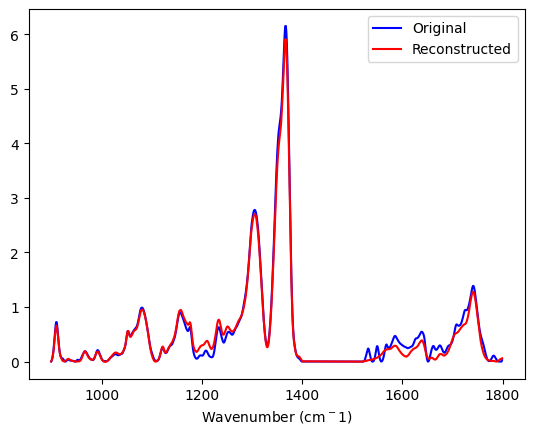

In [44]:
plt.plot(wavenumber, absorbance, c='b')
plt.plot(wavenumber, reconstructed, c='r')
plt.legend(['Original','Reconstructed'])
plt.xlabel(f'Wavenumber (cm$^{-1}$)')
plt.show()

# Save results to dataframe

In [45]:
hyperspectrum =pd.DataFrame(absorbance_list)
hyperspectrum.columns = wavenumber
hyperspectrum['map_x'] = df['map_x'].values
hyperspectrum['map_y'] = df['map_y'].values

Index([ 898.0,  899.0,  900.0,  901.0,  902.0,  903.0,  904.0,  905.0,  906.0,
        907.0,
       ...
       1790.0, 1791.0, 1792.0, 1793.0, 1794.0, 1795.0, 1796.0, 1797.0, 1798.0,
       1799.0],
      dtype='object', length=783)


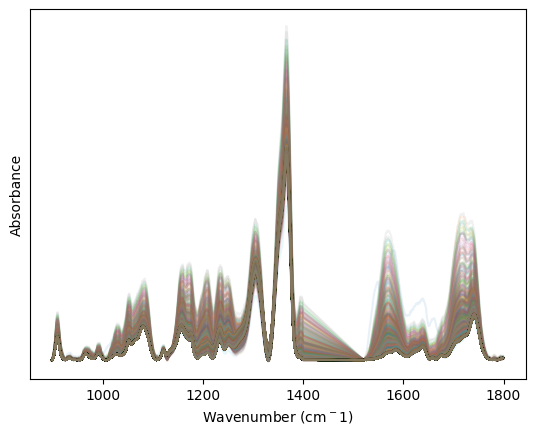

In [46]:
reconstructed=pd.DataFrame(reconstructed_list)
reconstructed.columns = wavenumber
reconstructed['map_x'] = df['map_x'].values
reconstructed['map_y'] = df['map_y'].values

print(reconstructed.columns[:-2])
for i in range(len(reconstructed.iloc[:,:-2])):
    plt.plot(reconstructed.columns[:-2], reconstructed.iloc[i,:-2], alpha=0.1)


plt.xlabel(f'Wavenumber (cm$^{-1}$)')
plt.ylabel('Absorbance')
plt.yticks([])
plt.show()

In [47]:
bvae_df =pd.DataFrame()
bvae_df['map_x'] = df['map_x'].values
bvae_df['map_y'] = df['map_y'].values
bvae_df['L1'] = L1_list
bvae_df['L2'] = L2_list
bvae_df['L3'] = L3_list
bvae_df['MSE'] = MSE_list

# Save to csv files for viewing in Viewing

In [48]:
path_to_save = 'C:/Users/Zach/Documents/GitHub/BVAE_processed/'
makedirs(path_to_save, exist_ok=True)
bvae_df.to_csv(path_to_save +'bvae_'+filename)

In [49]:
path_to_save = "C:/Users/Zach/Documents/GitHub/Hyperspectra/"
makedirs(path_to_save, exist_ok=True)

hyperspectrum.to_csv(path_to_save + 'hyperspectrum_'+ filename, index=False)

In [50]:
path_to_save = "C:/Users/Zach/Documents/GitHub/Reconstructions/"
makedirs(path_to_save, exist_ok=True)
reconstructed.to_csv(path_to_save +'reconstructed_'+filename, index=False)

# Plotting the MSE and Latent variables

Dataframe shape: (6144, 7), Filename: C:/Users/Zach/Documents/GitHub/BVAE_processed/bvae_SMP65#010 56d 820um.csv
64 96
6144


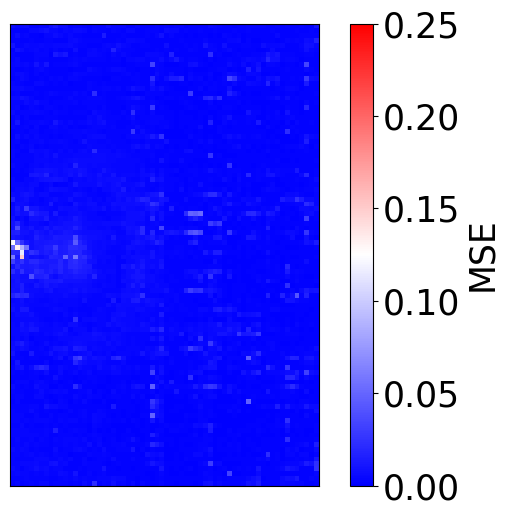

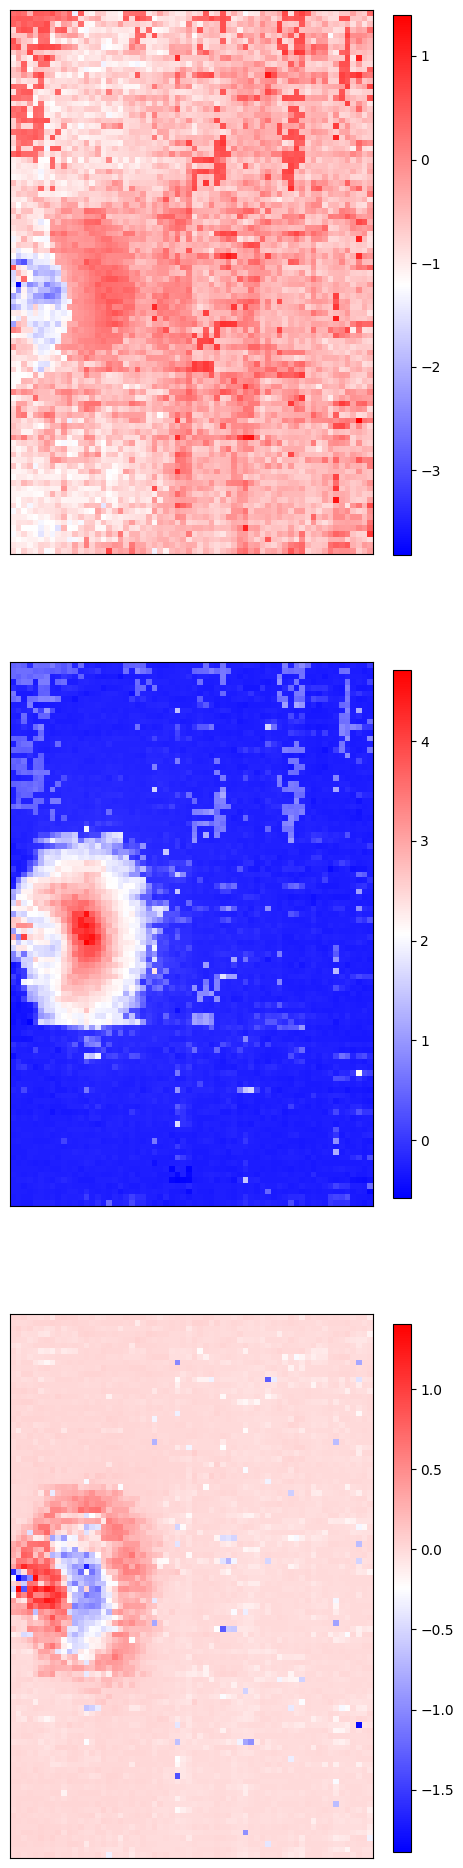

In [51]:
#The CSV file converted from the .0 file
#Change the directory and filename 
#directory = "C:/Users/Zach/Documents/BVAE_processed/"
filename = 'C:/Users/Zach/Documents/GitHub/BVAE_processed/bvae_'+ file

df_raw = pd.read_csv(filename)
df = df_raw.iloc[:,:].copy()

print(f"Dataframe shape: {df.shape}, Filename: {filename}")

vmin_mse = 0.0
vmax_mse = 0.25

vmin_latent = -0.3
vmax_latent = 0.3

#Reposition the mapping to start at 0,0 
Map_x = df['map_x'].to_numpy()
Map_y = df['map_y'].to_numpy()
Map_y2 = []
Map_x2 = []
Min_x = min(Map_x)
Min_y = min(Map_y)

Map_x2 = Map_x - Min_x
Map_y2 = Map_y - Min_y

x_adjusted=(np.unique(Map_x2)).tolist()
y_adjusted=(np.unique(Map_y2)).tolist()
print(len(x_adjusted), len(y_adjusted))
print(len(x_adjusted)*len(y_adjusted))

MSE = df['MSE'].values
L1 = df['L1'].values
L2 = df['L2'].values
L3 = df['L3'].values

#Set pixels with an MSE > 0.2 to 100 (or some number) so they can be masked out
MSE_check = MSE.copy()
for i in range(len(Map_x)):
    if MSE_check[i] > vmax_mse:
        MSE[i]= 100
        L1[i] = 100
        L2[i] = 100
        L3[i] = 100

target_size = len(x_adjusted) * len(y_adjusted)  # 65536
MSE_fixed = np.pad(MSE, (0, target_size - len(MSE)), constant_values=np.nan)

MSE_Z = MSE_fixed.reshape(len(y_adjusted), len(x_adjusted))

MSE_Z=np.reshape(MSE.copy(), (len(y_adjusted),len(x_adjusted)))
L1_Z=np.reshape(L1.copy(), (len(y_adjusted),len(x_adjusted)))
L2_Z=np.reshape(L2.copy(), (len(y_adjusted),len(x_adjusted)))
L3_Z=np.reshape(L3.copy(), (len(y_adjusted),len(x_adjusted)))

MSE_Z = np.ma.masked_array(MSE_Z, MSE_Z==100)
L1_Z = np.ma.masked_array(L1_Z, L1_Z==100)
L2_Z = np.ma.masked_array(L2_Z, L2_Z==100)
L3_Z = np.ma.masked_array(L3_Z, L3_Z==100)

X,Y = np.meshgrid(x_adjusted, y_adjusted)

fig1, ax1 = plt.subplots(figsize=(8, 6))

im1 = ax1.pcolormesh(X, Y, MSE_Z, vmin=vmin_mse, vmax=vmax_mse, cmap='bwr')

cbar = fig1.colorbar(im1)
cbar.ax.tick_params(labelsize=25)
cbar.set_label(r'MSE', fontsize=25)

ax1.set_aspect('equal')

ax1.set_xticks([])
ax1.set_yticks([])
# Create a divider for the existing axes
#divider1 = make_axes_locatable(ax1)
# Append a new axes for the colorbar with the same height as ax1
#cax = divider1.append_axes("right", size="5%", pad=0.1)  # size and pad are adjustable
#plt.title('MSE')
fig2 = plt.figure(figsize=(12,24))
ax2 = fig2.add_subplot(311)
im2 = ax2.pcolormesh(X,Y,L1_Z, cmap='bwr')
ax2.set_aspect('equal')

ax2.set_xticks([])
ax2.set_yticks([])

cax = fig2.add_axes([0.68, 0.653, 0.015, 0.225]) 
cbar = fig2.colorbar(im2, cax=cax)
"""

divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="15%")  # 'size' controls colorbar width
cbar = fig2.colorbar(im2, cax=cax, pad =0.02)
cbar.ax.tick_params(labelsize=10)
"""

# Create a divider for the existing axes
#divider2 = make_axes_locatable(ax2)
# Append a new axes for the colorbar with the same height as ax2
#cax = divider2.append_axes("right", size="5%", pad=0.1)  # size and pad are adjustable
#fig2.colorbar(im2, cax=cax)
#cbar.set_label(r'L1', fontsize=12)

#plt.title('L1')


ax3 = fig2.add_subplot(312)
im3 = ax3.pcolormesh(X,Y,L2_Z, cmap='bwr')
ax3.set_aspect('equal')
ax3.set_xticks([])
ax3.set_yticks([])
cbar.ax.tick_params(labelsize=10)

cax = fig2.add_axes([0.68, 0.385, 0.015, 0.22]) 
cbar = fig2.colorbar(im3, cax=cax, pad=0.1)

# Create a divider for the existing axes
#divider3 = make_axes_locatable(ax3)
# Append a new axes for the colorbar with the same height as ax3
#cax = divider3.append_axes("right", size="5%", pad=0.1)  # size and pad are adjustable
#fig3.colorbar(im3, cax=cax)
#cbar = fig2.colorbar(im3)
#cbar.ax.tick_params(labelsize=12)
#cbar.set_label(r'L2', fontsize=12)

#plt.title('L2')


ax4 = fig2.add_subplot(313)
im4 = ax4.pcolormesh(X,Y,L3_Z, cmap='bwr')
ax4.set_aspect('equal')
ax4.set_xticks([])
ax4.set_yticks([])
cbar.ax.tick_params(labelsize=10)

cax = fig2.add_axes([0.68, 0.1125, 0.015, 0.22]) 
cbar = fig2.colorbar(im4, cax=cax, pad=0.1)

# Create a divider for the existing axes
#divider4 = make_axes_locatable(ax4)
# Append a new axes for the colorbar with the same height as ax4
#cax = divider4.append_axes("right", size="5%", pad=0.1)  # size and pad are adjustable
#fig4.colorbar(im4, cax=cax)
#cbar.set_label(r'L3', fontsize=12)

#plt.title('L3')

# Plot histogram of Mean Squared Error 

Text(0.5, 0, 'Mean Square Error (%)')

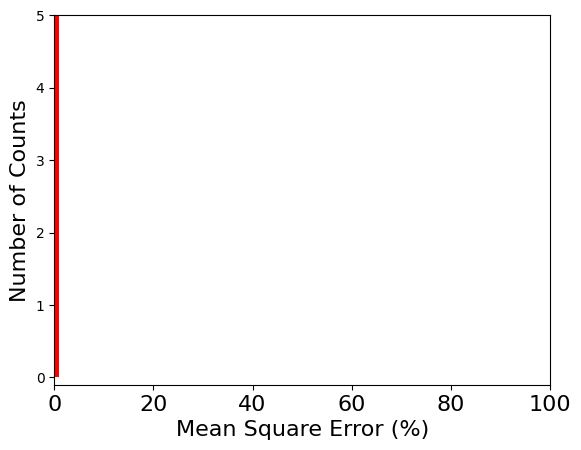

In [52]:
bin_width = 1
bins = np.arange(min(MSE), max(MSE) + bin_width, bin_width)

plt.hist(MSE, bins=bins, color='r')
#plt.yticks([])
plt.xticks(fontsize=16)
plt.ylim([-0.1, 5])
plt.xlim([0, 100])
plt.ylabel('Number of Counts', fontsize=16)
plt.xlabel(f'Mean Square Error (%)', fontsize=16)
